In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlub-learning-to-count/train.txt
/kaggle/input/mlub-learning-to-count/test/test/test_composite000000426.png
/kaggle/input/mlub-learning-to-count/train/train/train_composite000012068.png


In [2]:
df_train = pd.read_csv('/kaggle/input/mlub-learning-to-count/train.txt',sep=' ',header=None)

# take only the first 200 images
df_train = df_train.head(500)

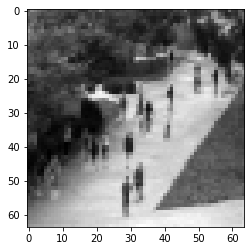

In [3]:
import imageio
from skimage import transform,io
import matplotlib.pyplot as plt
# read images and store into a np array

data_dir = '/kaggle/input/mlub-learning-to-count/train/'
im_size = 64
N = df_train.shape[0]
X = np.zeros((N, im_size,im_size))
y = np.zeros((N))
cont =0

for ind, item in df_train.iterrows():
    im       = imageio.imread(data_dir + item[0])/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X[cont, :,:] = small_im
    y[cont] = item[1]
    cont+=1
    
plt.imshow(small_im,cmap='gray')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.33, random_state=66)

In [5]:
from sklearn.ensemble import RandomForestRegressor
# random forest model 
rfc = RandomForestRegressor()
rfc.fit(X_train.reshape((X_train.shape[0],-1)),y_train)
# predictions
rfc_predict = rfc.predict(X_val.reshape((X_val.shape[0],-1)))


5.370699012120105


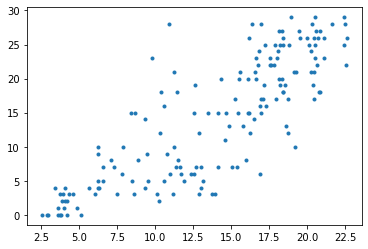

In [6]:
from sklearn.metrics import mean_squared_error
plt.plot(rfc_predict,y_val,'.')

print(np.sqrt(mean_squared_error(rfc_predict,y_val)))

In [7]:
## With a Neural Network

import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[64, 64]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

In [9]:
model.layers

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1229100   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,259,301
Trainable params: 1,259,301
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error",
              optimizer="rmsprop")

In [12]:
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_val, y_val),verbose=1)

Epoch 1/500
11/11 [==============================] - 0s 26ms/step - loss: 161.0131 - val_loss: 108.2478
Epoch 2/500
11/11 [==============================] - 0s 16ms/step - loss: 94.8585 - val_loss: 106.2718
Epoch 3/500
11/11 [==============================] - 0s 12ms/step - loss: 97.5993 - val_loss: 98.0986
Epoch 4/500
11/11 [==============================] - 0s 12ms/step - loss: 92.7165 - val_loss: 127.7287
Epoch 5/500
11/11 [==============================] - 0s 13ms/step - loss: 93.3592 - val_loss: 95.9869
Epoch 6/500
11/11 [==============================] - 0s 12ms/step - loss: 95.9717 - val_loss: 91.0593
Epoch 7/500
11/11 [==============================] - 0s 11ms/step - loss: 88.9319 - val_loss: 122.4258
Epoch 8/500
11/11 [==============================] - 0s 12ms/step - loss: 95.8365 - val_loss: 87.7223
Epoch 9/500
11/11 [==============================] - 0s 12ms/step - loss: 82.9677 - val_loss: 130.3914
Epoch 10/500
11/11 [==============================] - 0s 12ms/step - loss: 9

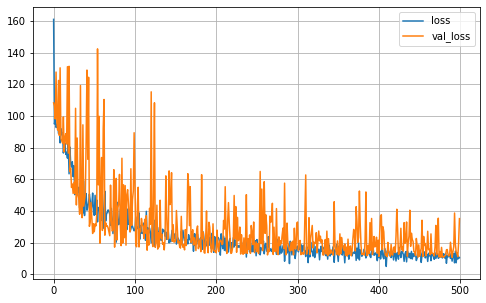

In [13]:
import pandas as pd

pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0.4, 0.8)
plt.show()

5.928446293080017

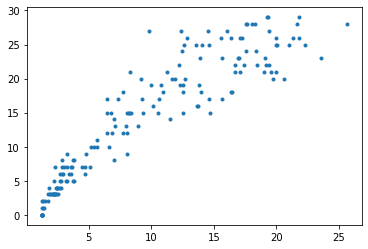

In [14]:
y_model1 = model.predict(X_val)

plt.plot(y_model1,y_val,'.')
np.sqrt(mean_squared_error(y_model1,y_val))

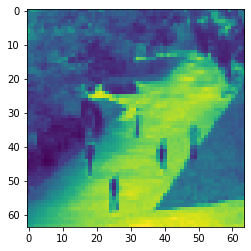

In [15]:
## evaluate test and generate submission
test_dir = '/kaggle/input/mlub-learning-to-count/test/test/'
im_size = 64
N = 500
X_test = np.zeros((N, im_size,im_size))
cont =0

for x in range(500):
    im       = imageio.imread(test_dir + 'test_composite'+str(x).zfill(9) + '.png')/255.
    small_im = transform.resize(im, (im_size,im_size), mode='symmetric', preserve_range=True)
    X_test[cont, :,:] = small_im
    cont+=1
    
plt.imshow(small_im)
plt.show()

In [16]:
# create the file to make the sumbission

y_test = model.predict(X_test)
y_test = [int(x[0]) for x in y_test]

df_output = pd.DataFrame(y_test)
df_output.index.name = 'index'
df_output.columns = ['prediction']
df_output.to_csv('output.csv')
